In [1]:
#Import dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data.csv')

In [28]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,reversable defect,heart disease
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,heart disease
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,heart disease
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,heart disease
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,heart disease


In [3]:
#Examine dataframe

print('Shape of the data is ', df.shape)

Shape of the data is  (303, 14)


In [4]:
# Examine data types and feature descriptions 

# age - Age in years

# sex - Sex of patient
# 1: male
# 2: female

# cp - Chest pain type (angina)
# 0: typical angina?
# 1: atypical?
# 2: non-anginal? 
# 3: asymptomatic?

# trestbps - Resting blood pressure (in mm Hg on admission to the hospital)

# chol - Serum cholestoral in mg/dl

# fbs - Fasting blood sugar
# 0: false
# 1: true

# restecg - Resting electrocardiographic results
# 0: Normal
# 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

# thalach - maximum heart rate achieved

# exang - Exercise induced angina 
# 0: No
# 1: Yes

# oldpeak - ST depression induced by exercisse relative to rest: ST depression in ECG at entry indicates severe coronary lesions and large benefits of an early invasive treatment strategy in unstable coronary artery disease; 

#slope - Slope of the peak exercise ST segment
# 0: up
# 1: flat
# 2: down

# ca - Number of major vessels (0-3) colored by flourosopy
# 0
# 1
# 2
# 4: drop from dataset!

#thal - Thalassemia (blood disorder) - Results of bloodflow observed via radioactive dye
# 0: drop from dataset!
# 1: reversible defect - Blood flow is observed but not normal
# 2: fixed defect - No blood flow in some part of heart
# 3: normal - Normal blood flow

# target
# 0: No disease
# 1: Disease

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Examine the dataset characteristics (look for outliers)

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
# Check for null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Eliminate bad data
df = df[df['ca'] < 4] # Range is 0-3
df = df[df['thal'] > 0] # Range is 1-3
print(f'The length of the data now is {len(df)} instead of 303')

The length of the data now is 296 instead of 303


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
cp,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
trestbps,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
chol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fbs,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
restecg,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
thalach,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exang,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
oldpeak,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


In [11]:
# Rename features

df = df.rename(
     columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
     errors="raise")

In [12]:
# Rename parameters

df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 0] = 'normal'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'reversable defect'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'normal'

df['target'][df['target'] == 1] = 'heart disease'
df['target'][df['target'] == 0] = 'no disease'


In [13]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,reversable defect,heart disease
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,heart disease
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,heart disease
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,heart disease
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,heart disease


In [14]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
298,57,female,typical angina,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,flat,0,normal,no disease
299,45,male,asymptomatic,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,flat,0,normal,no disease
300,68,male,typical angina,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,flat,2,normal,no disease
301,57,male,typical angina,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,flat,1,normal,no disease
302,57,female,atypical angina,130,236,lower than 120mg/ml,normal,174,no,0.0,flat,1,fixed defect,no disease


In [15]:
# Group features by data type

# numerical  
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']

# categorical (multi)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']

cat_feats = nom_feats + bin_feats

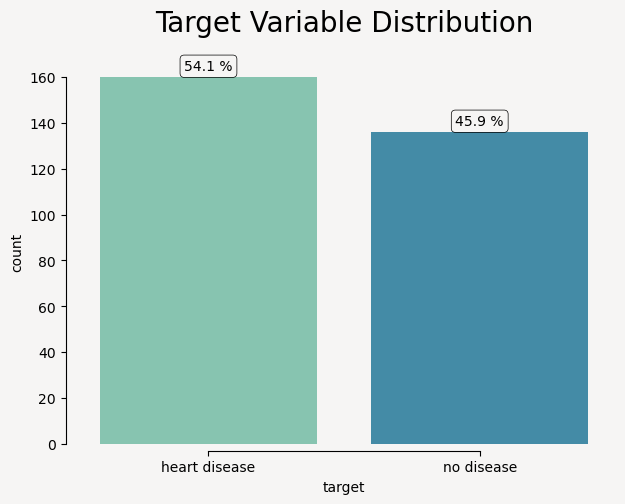

In [16]:
# Examine target distribution
# Choose color palette: https://www.color-hex.com/color-palette/37090
mypal= ['#aadbad', '#7dceb3', '#46b8c1','#278aa7', '#227eab','#3492b6']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target Variable Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)


In [17]:
# Examine numerical features - Develop summary for Deck

df[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


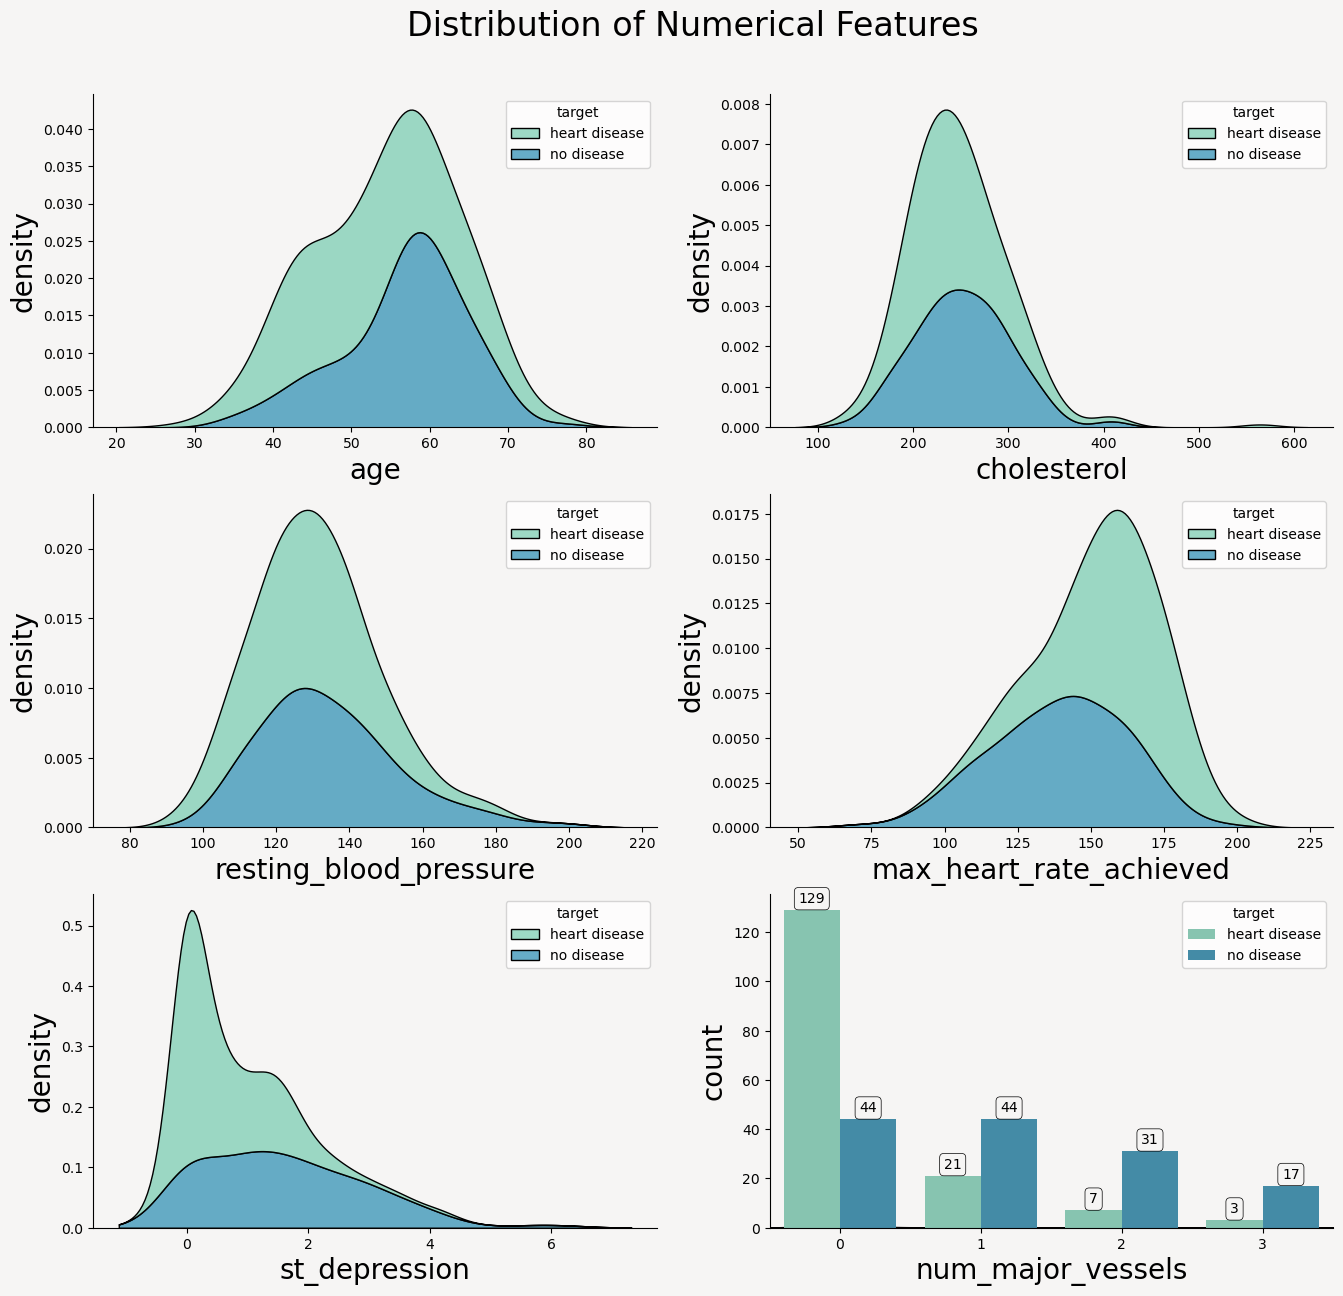

In [21]:
# Distribution of Numerical Features (Density Plots)

L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=df, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=df, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);


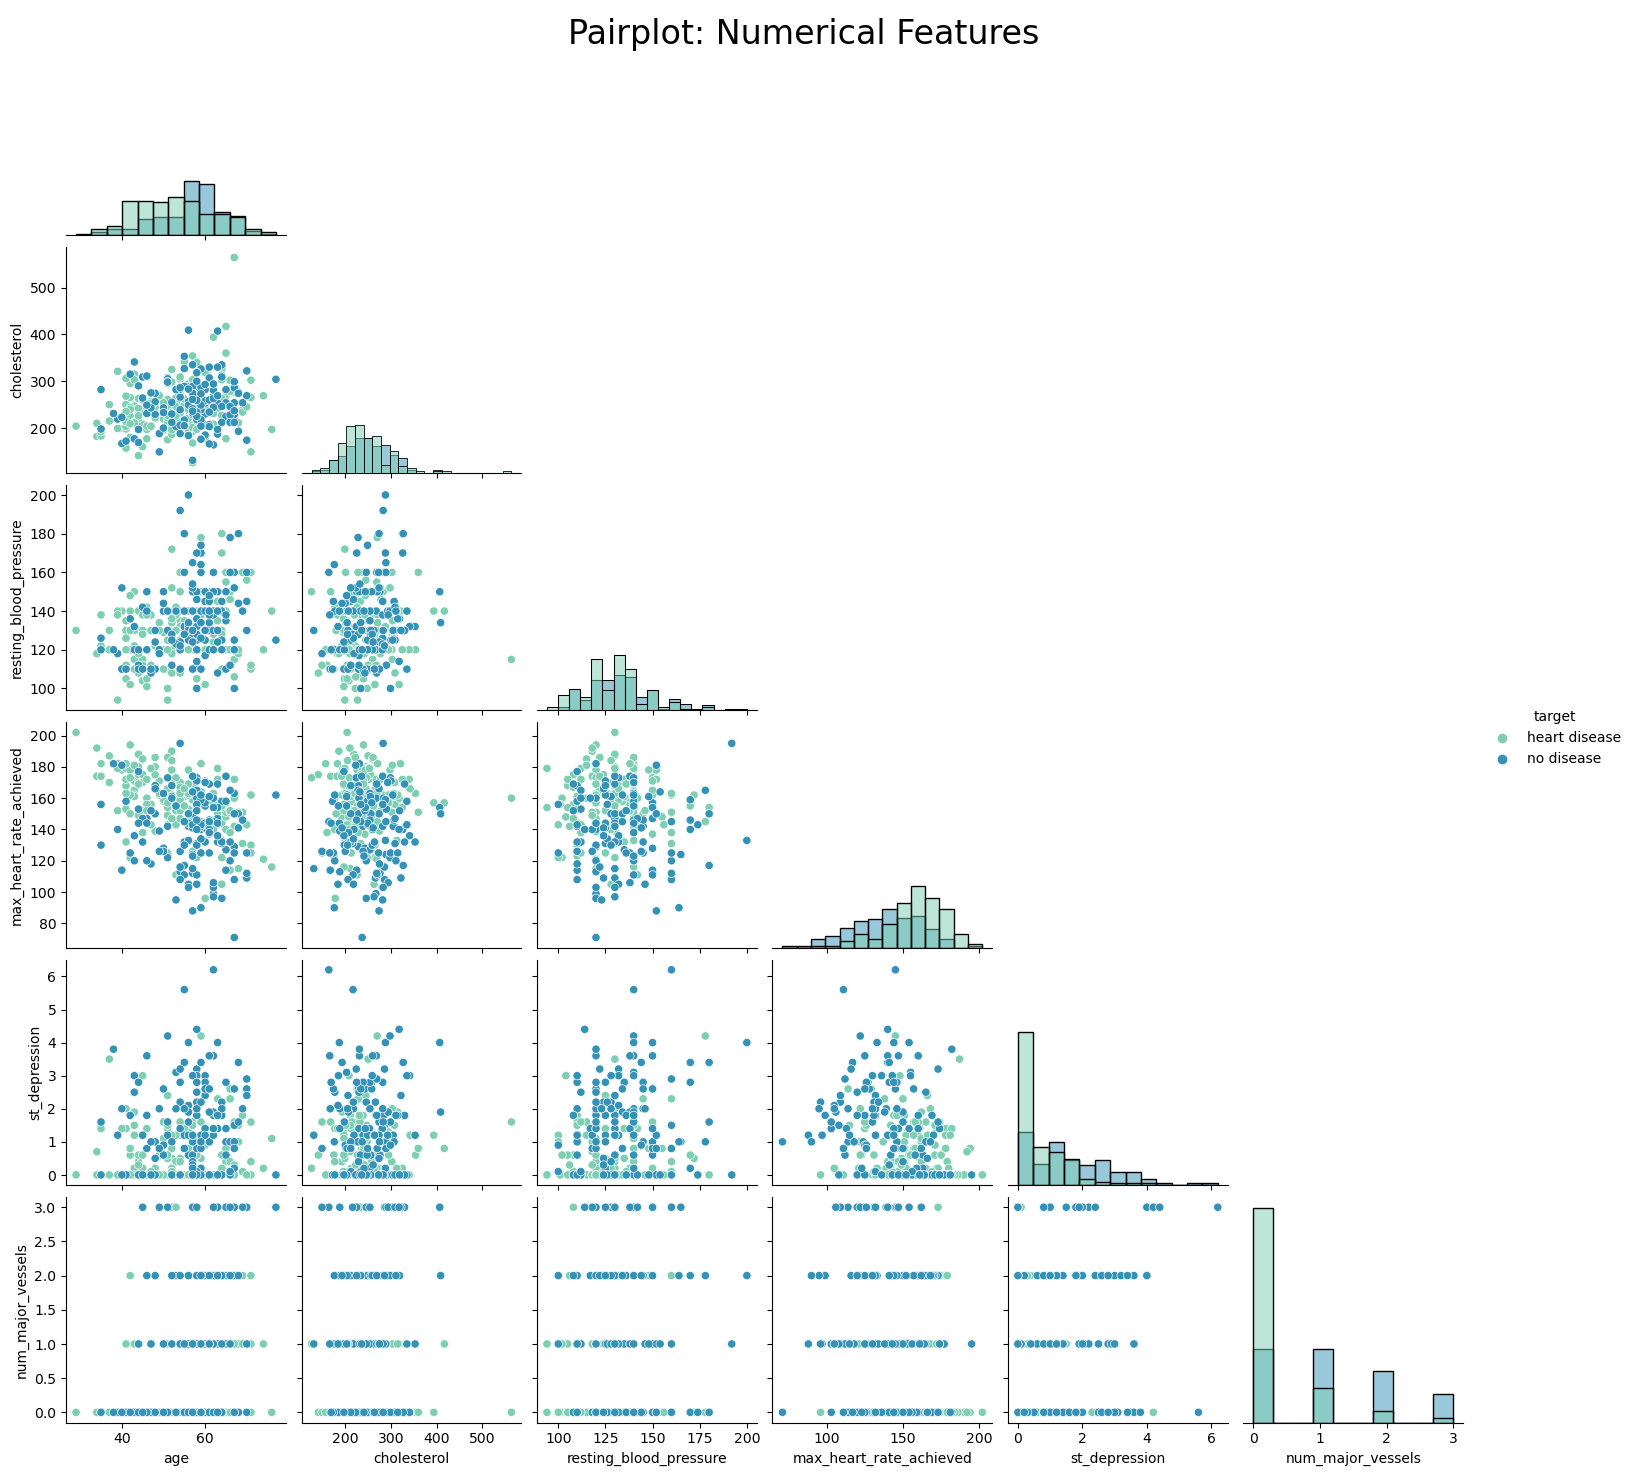

In [22]:
# Examine Numerical Features - Distibution - Pair Plots

_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']
df_ = df[_]
g = sns.pairplot(df_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);


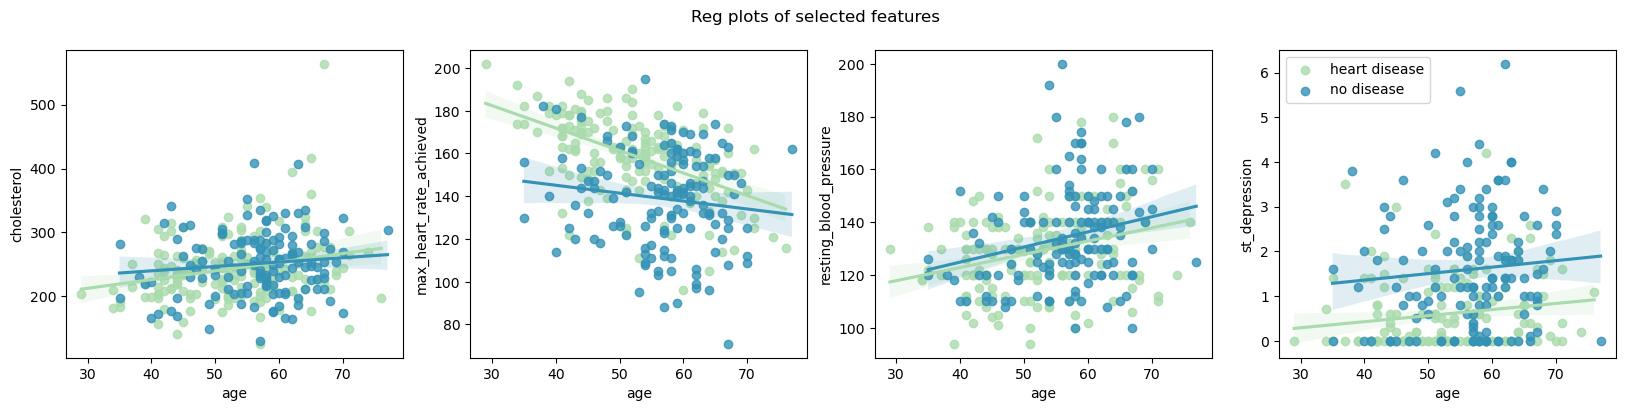

In [23]:
# Examine Numerical Features - Distribution - Reg-plots showing linear relation  
# All positive linear relation with age minius max heart rate and st_dep weak

fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=df[df['target'] =='heart disease'], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='heart disease')
sns.regplot(data=df[df['target'] =='no disease'], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='no disease')
sns.regplot(data=df[df['target'] =='heart disease'], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='heart disease')
sns.regplot(data=df[df['target'] =='no disease'], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='no disease')
sns.regplot(data=df[df['target'] =='heart disease'], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='heart disease')
sns.regplot(data=df[df['target'] =='no disease'], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='no disease')
sns.regplot(data=df[df['target'] =='heart disease'], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='heart disease')
sns.regplot(data=df[df['target'] =='no disease'], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='no disease')
plt.suptitle('Reg plots of selected features')
plt.legend();

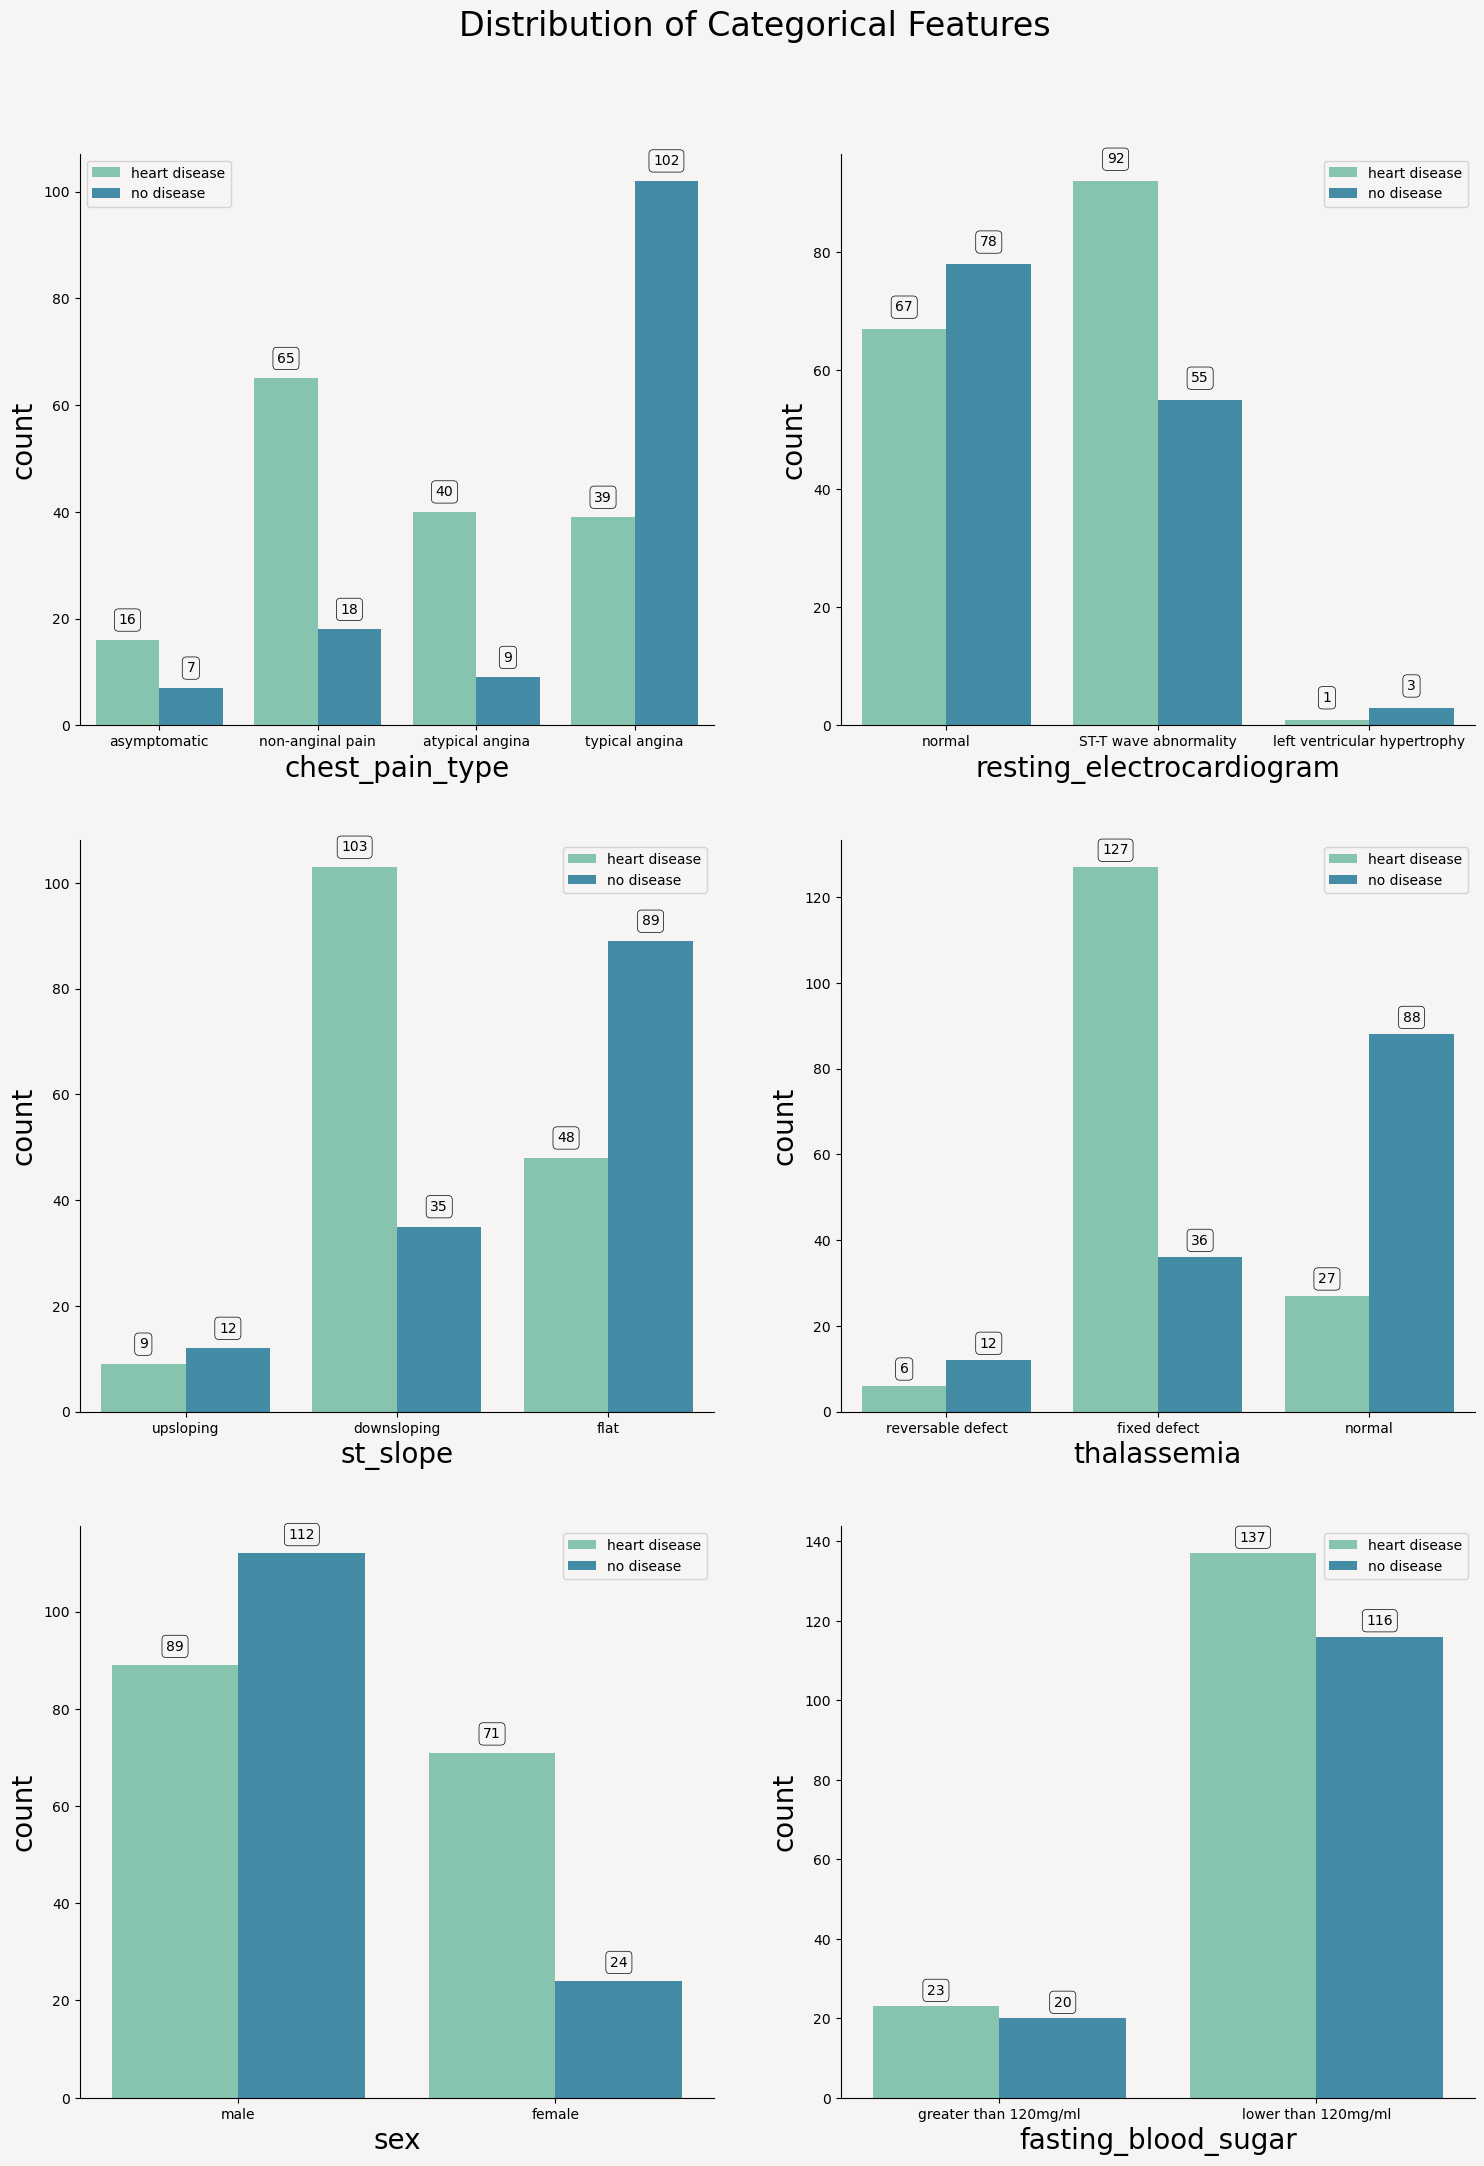

In [24]:
# Examine Categorical Features - Count plot

def count_plot(df, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=df, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(df, cat_feats[0:-1]);

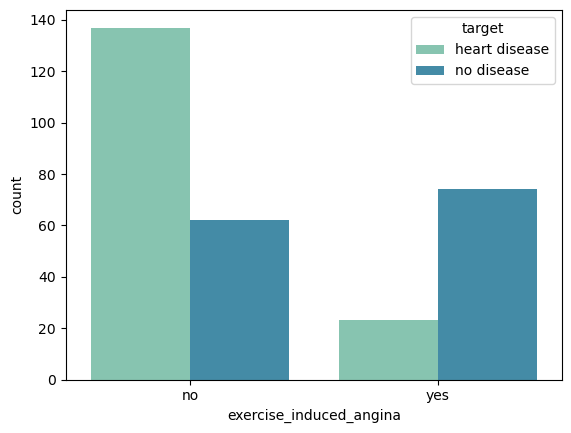

In [36]:
# count plot on two categorical variable
sns.countplot(x ='exercise_induced_angina', hue = "target", data = df, palette=mypal[1::4])

 
# Show the plot
plt.show()

        

In [ ]:
# Correlation Heatmaps - Represents how two features are related to each other.

df_ = df[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

In [ ]:
# the cramers_v function is copied from 
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data2 = df[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data2 :
        cramers =cramers_v(data2[x], data2[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df3 = pd.DataFrame(cramers_results, columns = data2.columns, index = data2.columns)

# color palette 
#'#aadbad', '#7dceb3', '#46b8c1','#278aa7', '#227eab','#3492b6']

mypal_1= ['#ffeeb7', '#7790ae', '#7790ae','#625faf', '#7790ae','#6f6cb3', '#ffeeb7', '#89b2a6', '#7790ae']
# plot the heat map
mask = np.triu(np.ones_like(df3, dtype=bool))
corr = df3.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

In [ ]:
df_corr = df.corr()
df_corr

In [ ]:
# Correlation Heatmap - 

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, linewidth=0.5, fmt='0.2f', cmap=sns.color_palette("vlag", as_cmap=True)
);


In [ ]:
sns.lmplot(data=df, x='age', y='max_heart_rate_achieved', hue='target');

In [ ]:
sns.lmplot(data=df, x='age', y='resting_blood_pressure', hue='target');

In [ ]:
sns.lmplot(data=df, x='age', y='cholesterol', hue='target');

In [ ]:
sns.lmplot(data=df, x='age', y='st_depression', hue='target');